In [1]:
import pandas as pd

titanic_train = pd.read_csv(r"/Users/osulalam/Documents/Projects/Titanic/train.csv")
print(titanic_train.head(), titanic_train.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S   (8

In [2]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
test = pd.read_csv(r"/Users/osulalam/Documents/Projects/Titanic/test.csv")

In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
test.shape

(418, 11)

In [6]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [7]:
titanic_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [8]:
titanic_train.groupby(['Survived','Sex','Pclass'])['Fare'].median()

Survived  Sex     Pclass
0         female  1         151.55000
                  2          17.00000
                  3          14.47915
          male    1          42.40000
                  2          13.00000
                  3           7.89580
1         female  1          82.17080
                  2          23.00000
                  3           9.46875
          male    1          35.50000
                  2          18.75000
                  3           8.05000
Name: Fare, dtype: float64

In [9]:
test['Fare'] = test['Fare'].fillna((7.8958+8.05)/2)
(7.8958+8.05)/2

7.972900000000001

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [11]:
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
#only 2 missing values let's print rows with missing values
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


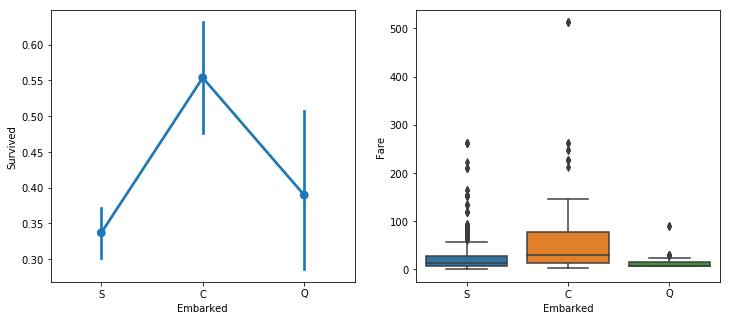

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.factorplot(x='Embarked', y='Survived', data=titanic_train, ax=ax1)
sns.boxplot(x='Embarked', y='Fare', data=titanic_train, ax=ax2)
plt.close(2)

Since passengers with higher fares and high mean survival embarked from 'C', we'll fill the 2 missing values with this location.

In [14]:
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('C')

titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
titanic_train['Embarked'].value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [16]:
titanic_train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
D              3
E101           3
C22 C26        3
F33            3
C92            2
B28            2
D26            2
B51 B53 B55    2
E8             2
C83            2
C78            2
E24            2
E33            2
B58 B60        2
C2             2
D33            2
B77            2
E121           2
F G73          2
E25            2
C93            2
D20            2
B5             2
E67            2
D35            2
C123           2
              ..
D19            1
B86            1
A36            1
D50            1
E10            1
D7             1
A7             1
B30            1
C128           1
C49            1
A14            1
A34            1
B71            1
C7             1
E40            1
A32            1
C99            1
E12            1
C46            1
A24            1
E50            1
C45            1
C103           1
B4             1
B82 B84        1
C30            1
D56            1
C50           

In [17]:
#going to create a new variable for Cabin containing only the 1st letter
titanic_train['Cabin_ID'] = titanic_train['Cabin'].str[0]
test['Cabin_ID'] = test['Cabin'].str[0]
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [19]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(list(titanic_train['Sex'].values)+list(test['Sex'].values))
titanic_train['Sex'] = label_encoder.transform(list(titanic_train['Sex'].values))
test['Sex'] = label_encoder.transform(list(test['Sex'].values))
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,NaN


In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [21]:
Embark_dum = pd.get_dummies(titanic_train['Embarked'])
Embark_dumt = pd.get_dummies(test['Embarked'])
Embark_dum.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [22]:
Embark_dumt.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [23]:
titanic_train['Embark_C'], test['Embark_C'] = Embark_dum['C'], Embark_dumt['C']
titanic_train['Embark_Q'], test['Embark_Q'] = Embark_dum['Q'], Embark_dumt['Q']
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID,Embark_C,Embark_Q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,NaN,0,0


In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID,Embark_C,Embark_Q
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,NaN,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,NaN,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,NaN,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,NaN,0,0


# Imputing Missing Age Variable

In [25]:
# new dataframe containing rows with known ages
new_train = titanic_train[titanic_train['Age'].notnull()]
new_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID,Embark_C,Embark_Q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,NaN,0,0


In [26]:
X = new_train.iloc[:, [1,2,4,6,7,9,13,14]].values
y = new_train.iloc[:, 5].values
print(X, y)

[[  0.       3.       1.     ...,   7.25     0.       0.    ]
 [  1.       1.       0.     ...,  71.2833   1.       0.    ]
 [  1.       3.       0.     ...,   7.925    0.       0.    ]
 ..., 
 [  1.       1.       0.     ...,  30.       0.       0.    ]
 [  1.       1.       1.     ...,  30.       1.       0.    ]
 [  0.       3.       1.     ...,   7.75     0.       1.    ]] [ 22.    38.    26.    35.    35.    54.     2.    27.    14.     4.    58.
  20.    39.    14.    55.     2.    31.    35.    34.    15.    28.     8.
  38.    19.    40.    66.    28.    42.    21.    18.    14.    40.    27.
   3.    19.    18.     7.    21.    49.    29.    65.    21.    28.5    5.
  11.    22.    38.    45.     4.    29.    19.    17.    26.    32.    16.
  21.    26.    32.    25.     0.83  30.    22.    29.    28.    17.    33.
  16.    23.    24.    29.    20.    46.    26.    59.    71.    23.    34.
  34.    28.    21.    33.    37.    28.    21.    38.    47.    14.5   22.
  20.    17.

In [27]:
new_test = test[test['Age'].notnull()]
new_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID,Embark_C,Embark_Q
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,NaN,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,NaN,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,NaN,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,NaN,0,0


In [28]:
Xt = new_test.iloc[:,[1,3,5,6,8,12,13]].values
yt = new_test.iloc[:, 4].values

## Predicting Age Using Lasso Regression

In [29]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=0)
reg = linear_model.Lasso(alpha=.1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_val)
mean_squared_error(y_val, y_pred)

/Users/osulalam/anaconda/envs/Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


145.41022252507383

## Predicting Age Using Ridge Regression

In [30]:
reg = linear_model.Ridge(alpha=.1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_val)
mean_squared_error(y_val, y_pred)

143.96631219838298

Comparing the MSE of the regression models when its average MSE is used instead of the regression predictions:

In [31]:
import numpy as np

y_mean = np.empty(143) 
#np.empty(shape,dtype=float,order='C') returns empty array with a shape of 143
y_mean.fill(y_pred.sum()/len(y_pred))
mean_squared_error(y_val, y_mean)

213.86417554358994

Since the Ridge Regression gives the lowest MSE, we will use it as our imputation method. 

In [32]:
df = titanic_train[titanic_train['Age'].isnull()]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID,Embark_C,Embark_Q
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,NaN,0,1
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S,NaN,0,0
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C,NaN,1,0
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C,NaN,1,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q,NaN,0,1


In [33]:
X = df.iloc[:, [1,2,4,6,7,9,13,14]].values
y = reg.predict(X)
print(type(y), y.shape)

<class 'numpy.ndarray'> (177,)


In [34]:
df['Age'] = y
titanic_train = new_train.append(df)
titanic_train.head()

/Users/osulalam/anaconda/envs/Python35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID,Embark_C,Embark_Q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,NaN,0,0


In [35]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Cabin_ID       687
Embark_C         0
Embark_Q         0
dtype: int64

In [36]:
X_test, X_valt, y_test, y_valt = train_test_split(Xt, yt, test_size=.2, random_state=0)
reg.fit(X_test, y_test)
y_predt = reg.predict(X_valt)
mean_squared_error(y_valt, y_predt)

151.78128873784493

In [37]:
df_test = test[test['Age'].isnull()]
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID,Embark_C,Embark_Q
10,902,3,"Ilieff, Mr. Ylio",1,NaN,0,0,349220,7.8958,NaN,S,NaN,0,0
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",0,NaN,0,0,PC 17598,31.6833,NaN,S,NaN,0,0
29,921,3,"Samaan, Mr. Elias",1,NaN,2,0,2662,21.6792,NaN,C,NaN,1,0
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,0,0
36,928,3,"Roth, Miss. Sarah A",0,NaN,0,0,342712,8.0500,NaN,S,NaN,0,0


In [38]:
Xt = df_test.iloc[:,[1,3,5,6,8,12,13]].values
yt = reg.predict(Xt)
df_test['Age'] = yt
test = new_test.append(df_test)
test.head()

/Users/osulalam/anaconda/envs/Python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID,Embark_C,Embark_Q
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,NaN,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,NaN,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,NaN,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,NaN,0,0


In [39]:
print("Mean Age: ", titanic_train['Age'].mean())
print("Median Age: ", titanic_train['Age'].median())

Mean Age:  29.372782659306623
Median Age:  28.990585677313828


# Imputing Missing Cabin Variable

In [40]:
#let's predict the missing values of cabin_id
new_train = titanic_train[titanic_train['Cabin_ID'].notnull()]
print(new_train.head(),new_train.shape)

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name  Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
6                             McCarthy, Mr. Timothy J    1  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut    0   4.0      1   
11                           Bonnell, Miss. Elizabeth    0  58.0      0   

    Parch    Ticket     Fare Cabin Embarked Cabin_ID  Embark_C  Embark_Q  
1       0  PC 17599  71.2833   C85        C        C         1         0  
3       0    113803  53.1000  C123        S        C         0         0  
6       0     17463  51.8625   E46        S        E         0         0  
10      1   PP 9549  16.70

In [41]:
X = new_train.iloc[:, [1,2,4,5,6,7,9,13,14]].values
y = new_train.iloc[:, 12].values
print(X, y)

[[  1.       1.       0.     ...,  71.2833   1.       0.    ]
 [  1.       1.       0.     ...,  53.1      0.       0.    ]
 [  0.       1.       1.     ...,  51.8625   0.       0.    ]
 ..., 
 [  0.       1.       1.     ...,   0.       0.       0.    ]
 [  1.       1.       1.     ...,  29.7      1.       0.    ]
 [  1.       1.       0.     ...,  89.1042   1.       0.    ]] ['C' 'C' 'E' 'G' 'C' 'D' 'A' 'C' 'D' 'B' 'B' 'C' 'F' 'F' 'C' 'E' 'A' 'D'
 'D' 'C' 'B' 'E' 'D' 'D' 'C' 'B' 'F' 'C' 'B' 'A' 'C' 'F' 'F' 'B' 'B' 'G'
 'A' 'D' 'D' 'C' 'C' 'C' 'D' 'G' 'C' 'B' 'E' 'B' 'C' 'C' 'C' 'D' 'B' 'D'
 'C' 'B' 'C' 'C' 'E' 'C' 'B' 'C' 'E' 'C' 'D' 'B' 'C' 'C' 'C' 'E' 'T' 'F'
 'C' 'F' 'E' 'D' 'B' 'E' 'C' 'B' 'D' 'G' 'C' 'E' 'C' 'E' 'B' 'C' 'A' 'C'
 'C' 'C' 'E' 'E' 'E' 'D' 'B' 'C' 'B' 'C' 'D' 'C' 'B' 'C' 'E' 'D' 'F' 'B'
 'B' 'B' 'B' 'B' 'C' 'C' 'A' 'E' 'C' 'E' 'E' 'C' 'A' 'E' 'B' 'D' 'A' 'C'
 'F' 'D' 'D' 'D' 'A' 'B' 'B' 'D' 'A' 'D' 'E' 'B' 'B' 'D' 'B' 'B' 'C' 'F'
 'C' 'E' 'E' 'C' 'C' 'F' 'C' 'E' 'E'

In [42]:
new_train['Cabin_ID'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_ID, dtype: int64

## Support Vector Machine

In [43]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1)
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean()

/Users/osulalam/anaconda/envs/Python35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


0.27331835511982572

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean()

/Users/osulalam/anaconda/envs/Python35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


0.308244825708061

## Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean()

/Users/osulalam/anaconda/envs/Python35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


0.34807325708061004

## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean()

/Users/osulalam/anaconda/envs/Python35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


0.37197031590413943

KNN provides the best accuracy score so we'll use this method to impute the Cabin variable.

In [47]:
# here new_train will store all the data with NaN in Cabin
df = titanic_train[titanic_train['Cabin_ID'].isnull()]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ID,Embark_C,Embark_Q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,NaN,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,NaN,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,NaN,0,0


In [48]:
X = df.iloc[:, [1,2,4,5,6,7,9,13,14]].values
print(X)

[[  0.       3.       1.     ...,   7.25     0.       0.    ]
 [  1.       3.       0.     ...,   7.925    0.       0.    ]
 [  0.       3.       1.     ...,   8.05     0.       0.    ]
 ..., 
 [  0.       3.       1.     ...,   9.5      0.       0.    ]
 [  0.       3.       1.     ...,   7.8958   0.       0.    ]
 [  0.       3.       0.     ...,  23.45     0.       0.    ]]


In [49]:
pred = clf.predict(X)
print(pred)

['F' 'F' 'E' 'G' 'E' 'B' 'F' 'C' 'F' 'E' 'F' 'E' 'E' 'F' 'G' 'C' 'E' 'E'
 'C' 'D' 'F' 'F' 'F' 'F' 'G' 'F' 'F' 'F' 'F' 'F' 'C' 'F' 'F' 'F' 'D' 'F'
 'F' 'F' 'F' 'F' 'F' 'D' 'D' 'E' 'B' 'F' 'F' 'F' 'F' 'A' 'F' 'E' 'D' 'F'
 'F' 'F' 'G' 'E' 'E' 'E' 'G' 'E' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'D' 'F' 'E'
 'C' 'F' 'D' 'B' 'E' 'F' 'F' 'E' 'F' 'F' 'C' 'F' 'D' 'F' 'F' 'G' 'F' 'F'
 'D' 'F' 'F' 'F' 'E' 'E' 'D' 'A' 'F' 'F' 'F' 'D' 'F' 'F' 'F' 'G' 'C' 'E'
 'F' 'G' 'F' 'F' 'E' 'A' 'F' 'F' 'B' 'D' 'F' 'E' 'D' 'F' 'F' 'F' 'G' 'B'
 'F' 'F' 'E' 'G' 'F' 'F' 'E' 'F' 'E' 'F' 'E' 'F' 'F' 'E' 'E' 'F' 'F' 'F'
 'D' 'F' 'E' 'F' 'F' 'A' 'F' 'F' 'D' 'F' 'F' 'F' 'F' 'G' 'E' 'E' 'E' 'E'
 'B' 'D' 'F' 'F' 'D' 'F' 'F' 'E' 'F' 'F' 'F' 'E' 'F' 'F' 'F' 'E' 'F' 'F'
 'F' 'F' 'B' 'F' 'F' 'F' 'F' 'C' 'C' 'F' 'E' 'F' 'C' 'E' 'F' 'F' 'F' 'B'
 'E' 'C' 'F' 'F' 'E' 'F' 'D' 'D' 'G' 'F' 'F' 'F' 'G' 'G' 'D' 'F' 'C' 'F'
 'E' 'F' 'F' 'F' 'C' 'G' 'F' 'F' 'F' 'C' 'G' 'E' 'C' 'D' 'F' 'D' 'F' 'F'
 'G' 'F' 'F' 'A' 'F' 'E' 'F' 'F' 'F' 'E' 'F' 'E' 'E

In [50]:
# add predictions of Cabin_ID to dataframe
df['Cabin_ID'] = pred
df['Cabin_ID'].value_counts()

/Users/osulalam/anaconda/envs/Python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


F    371
E    123
D     61
C     47
G     37
A     27
B     21
Name: Cabin_ID, dtype: int64

In [51]:
titanic_train = new_train.append(df)
print(titanic_train.head(), titanic_train.shape)

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name  Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
6                             McCarthy, Mr. Timothy J    1  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut    0   4.0      1   
11                           Bonnell, Miss. Elizabeth    0  58.0      0   

    Parch    Ticket     Fare Cabin Embarked Cabin_ID  Embark_C  Embark_Q  
1       0  PC 17599  71.2833   C85        C        C         1         0  
3       0    113803  53.1000  C123        S        C         0         0  
6       0     17463  51.8625   E46        S        E         0         0  
10      1   PP 9549  16.70

In [52]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Cabin_ID         0
Embark_C         0
Embark_Q         0
dtype: int64

In [53]:
titanic_train = titanic_train.drop(['PassengerId','Name','Ticket','Embarked','Cabin'], axis=1)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ID,Embark_C,Embark_Q
1,1,1,0,38.0,1,0,71.2833,C,1,0
3,1,1,0,35.0,1,0,53.1000,C,0,0
6,0,1,1,54.0,0,0,51.8625,E,0,0
10,1,3,0,4.0,1,1,16.7000,G,0,0
11,1,1,0,58.0,0,0,26.5500,C,0,0


In [54]:
Cabin_dum = pd.get_dummies(titanic_train['Cabin_ID'])
Cabin_dum.head()

,A,B,C,D,E,F,G,T
1,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,1,0
11,0,0,1,0,0,0,0,0


In [55]:
Cabin_dum = Cabin_dum.drop('T', axis=1)
Cabin_dum.head()

,A,B,C,D,E,F,G
1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0
10,0,0,0,0,0,0,1
11,0,0,1,0,0,0,0


In [56]:
# append cabin dummies to dataframe
for i in Cabin_dum.columns:
    titanic_train['Cabin_'+ str(i)] = Cabin_dum[i]

In [57]:
print(titanic_train.head(), titanic_train.shape)

    Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin_ID  Embark_C  \
1          1       1    0  38.0      1      0  71.2833        C         1   
3          1       1    0  35.0      1      0  53.1000        C         0   
6          0       1    1  54.0      0      0  51.8625        E         0   
10         1       3    0   4.0      1      1  16.7000        G         0   
11         1       1    0  58.0      0      0  26.5500        C         0   

    Embark_Q  Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  
1          0        0        0        1        0        0        0        0  
3          0        0        0        1        0        0        0        0  
6          0        0        0        0        0        1        0        0  
10         0        0        0        0        0        0        0        1  
11         0        0        0        1        0        0        0        0   (891, 17)


In [58]:
titanic_train = titanic_train.drop('Cabin_ID',axis=1)
titanic_train.shape

(891, 16)

# Final Models
## Support Vector Machines

In [59]:
X = titanic_train.iloc[:,1:16].values
print(X, X.shape)

[[  1.           0.          38.         ...,   0.           0.           0.        ]
 [  1.           0.          35.         ...,   0.           0.           0.        ]
 [  1.           1.          54.         ...,   1.           0.           0.        ]
 ..., 
 [  3.           1.          28.97184118 ...,   0.           0.           1.        ]
 [  3.           1.          28.99257906 ...,   0.           1.           0.        ]
 [  3.           0.          23.31739292 ...,   0.           0.           0.        ]] (891, 15)


In [60]:
y = titanic_train.iloc[:,0].values

In [61]:
clf = SVC(kernel='linear', C=1)
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean()

0.78454397302491474

## Random Forest

In [62]:
clf = RandomForestClassifier(max_depth=15,random_state=0)
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean()

0.79135605316238733

## KNN

In [63]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean()

0.66668835415332051